In [2]:
import pandas as pd
import numpy as np
import os
import tensorflow as tf
import cv2
from tensorflow import keras
#from tensorflow.keras import layers, Dense, Input, InputLayer, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten,Input,InputLayer
from tensorflow.keras.models import Sequential, Model
from  matplotlib import pyplot as plt
import matplotlib.image as mpimg#Display an image with Python
%matplotlib inline
import random
from time import sleep
from tqdm import tqdm

In [3]:
image_path=r'C:\Users\Mroads\Desktop\learn\latest\DL_21_19\Day 7\seg_train1\forest\23.jpg'
img=mpimg.imread(image_path)

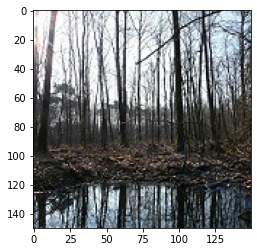

In [4]:
imgplot = plt.imshow(img)
plt.show()

In [6]:
image_path=r'C:\Users\Mroads\Desktop\learn\latest\DL_21_19\Day 7\seg_train1\forest'
image= cv2.imread( image_path, cv2.COLOR_BGR2RGB)

In [7]:
image=np.array(img)
image = image.astype('float32')

In [8]:
image

array([[[255., 252., 249.],
        [241., 225., 226.],
        [227., 187., 198.],
        ...,
        [147., 164., 172.],
        [ 39.,  56.,  66.],
        [121., 139., 151.]],

       [[255., 254., 251.],
        [246., 232., 232.],
        [228., 190., 201.],
        ...,
        [ 13.,  27.,  36.],
        [ 76.,  93., 103.],
        [161., 179., 191.]],

       [[255., 253., 250.],
        [242., 230., 230.],
        [221., 190., 198.],
        ...,
        [ 83.,  93., 103.],
        [123., 137., 150.],
        [116., 132., 147.]],

       ...,

       [[ 74.,  82.,  85.],
        [101., 110., 115.],
        [ 98., 107., 116.],
        ...,
        [ 19.,  25.,  23.],
        [ 14.,  21.,  14.],
        [ 39.,  44.,  37.]],

       [[136., 143., 149.],
        [108., 117., 124.],
        [150., 159., 168.],
        ...,
        [  5.,  14.,  11.],
        [ 10.,  16.,  12.],
        [ 25.,  32.,  25.]],

       [[ 43.,  50.,  56.],
        [ 65.,  74.,  81.],
        [144., 1

In [32]:
#Printing random five images from one of the folders

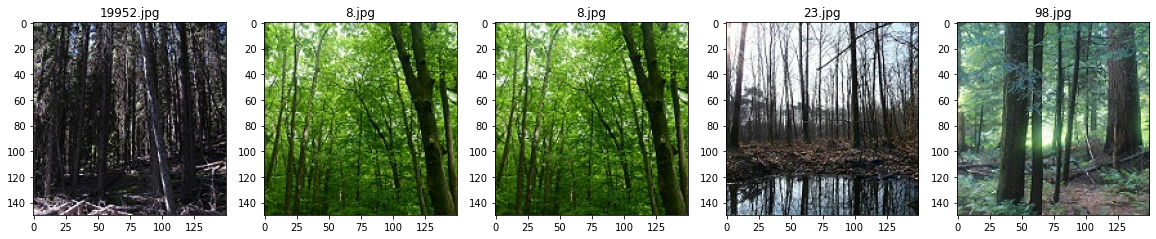

In [9]:
plt.figure(figsize=(20,20))
test_folder=r'C:\Users\Mroads\Desktop\learn\latest\DL_21_19\Day 7\seg_train1\forest'
for i in range(5):
    file = random.choice(os.listdir(test_folder))
    image_path= os.path.join(test_folder, file)
    img=mpimg.imread(image_path)#Display an image with Python
    ax=plt.subplot(1,5,i+1)
    ax.title.set_text(file)
    plt.imshow(img)

In [34]:
#Setting the Image dimension and source folder for loading the dataset

In [11]:
IMG_WIDTH=200
IMG_HEIGHT=200
img_folder=r'C:\Users\Mroads\Desktop\learn\latest\DL_21_19\Day 7\seg_train1'

In [36]:
Creating the image data and the labels from the images in the folder

In the function below

1.The source folder is the input parameter containing the images for different classes.
2.Read the image file from the folder and convert it to the right color format.
3.Resize the image based on the input dimension required for the model
4.Convert the image to a Numpy array with float32 as the datatype
5.Normalize the image array to have values scaled down between 0 and 1 from 0 to 255 for a similar data distribution, which helps with faster convergence.

SyntaxError: invalid syntax (Temp/ipykernel_20700/3942744650.py, line 1)

In [12]:
def create_dataset(img_folder):
    img_data_array=[]
    class_name=[]
   
    for dir1 in os.listdir(img_folder):
        for file in os.listdir(os.path.join(img_folder, dir1)):
       
            image_path= os.path.join(img_folder, dir1, file)
            #print(img_folder)
            image= cv2.imread( image_path, cv2.COLOR_BGR2RGB)
            if image is None:
                print('Wrong path:', image_path)
            else:
                    image=cv2.resize(image, (IMG_HEIGHT, IMG_WIDTH),interpolation = cv2.INTER_AREA)
                    image=np.array(image)
                    image = image.astype('float32')
                    image /= 255 
                    img_data_array.append(image)
                    class_name.append(dir1)
    return img_data_array, class_name
# extract the image array and class name
img_data, class_name =create_dataset(r'C:\Users\Mroads\Desktop\learn\latest\DL_21_19\Day 7\seg_train1')

In [40]:
#Converting text labels to numeric codes
#Create a dictionary for all unique values for the classes
#class_name

In [15]:
target_dict={k: v for v, k in enumerate(np.unique(class_name))}
target_dict

{'buildings': 0,
 'forest': 1,
 'glacier': 2,
 'mountain': 3,
 'sea': 4,
 'street': 5}

In [42]:
##Convert the class_names to their respective numeric value based on the dictionary

In [16]:
target_val=  [target_dict[class_name[i]] for i in range(len(class_name))]
#target_val

In [44]:
##Creating a simple deep learning model and compiling it

In [18]:
model=tf.keras.Sequential(
        [
            tf.keras.layers.InputLayer(input_shape=(IMG_HEIGHT,IMG_WIDTH, 3)),
            tf.keras.layers.Conv2D(filters=32, kernel_size=3, strides=(2, 2), activation='relu'),
            tf.keras.layers.Conv2D(filters=64, kernel_size=3, strides=(2, 2), activation='relu'),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(6)
        ])
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [46]:
#We finally fit our dataset to train the model. We can use Numpy array as the input

In [21]:
history = model.fit(x=np.array(img_data, np.float32), y=np.array(list(map(int,target_val)), np.float32), epochs=5)

Epoch 1/5
5/5 [==============================] - 1s 142ms/step - loss: 6.7234 - accuracy: 0.2252
Epoch 2/5
5/5 [==============================] - 1s 156ms/step - loss: 6.7234 - accuracy: 0.2252
Epoch 3/5
5/5 [==============================] - 1s 146ms/step - loss: 6.7234 - accuracy: 0.2252
Epoch 4/5
5/5 [==============================] - 1s 149ms/step - loss: 6.7234 - accuracy: 0.2252
Epoch 5/5
5/5 [==============================] - 1s 154ms/step - loss: 6.7234 - accuracy: 0.2252


In [22]:
test,label=create_dataset(r'C:\Users\Mroads\Desktop\learn\latest\DL_21_19\Day 7\Test')

In [23]:
p=model.predict(np.array(test, np.float32))
p

array([[-5.3106456,  2.839374 ,  5.455716 , -8.557906 ,  6.8734503,
         7.5767326]], dtype=float32)